# Esercizio 10.1
L'esercizio richiede dirisolvere il $TSP$ dei $110$ capoluoghi di provincia italiani utilizzando un algoritmo genetico con $11$ processi indipendenti che ogni $N_{migr}$ si scambiano gli individui migliori.

**Percorso di ogni rank. Core comunicanti**

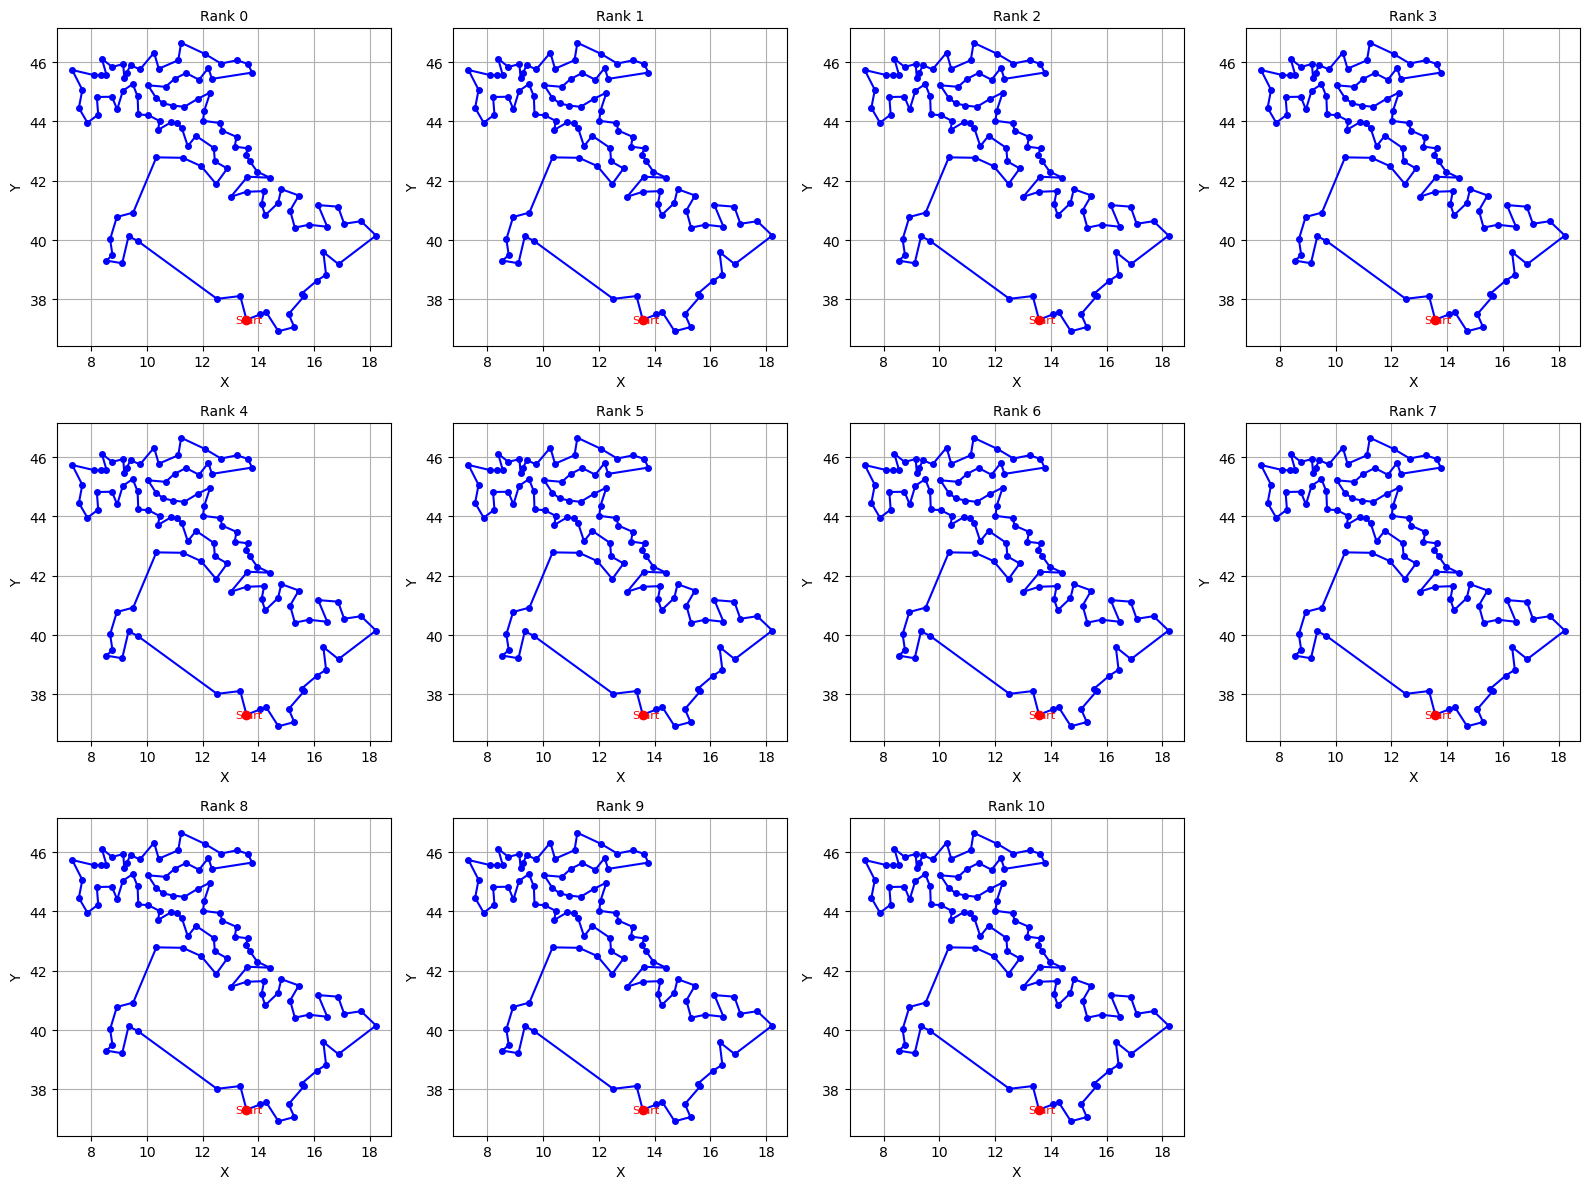

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Crea una griglia di subplot 3x4
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axes = axes.flatten()  # Trasforma in array 1D per accesso più semplice

for i in range(11):
    ax = axes[i]
    # Carica i dati
    data = np.loadtxt(f"comunicating/best_path_cartesian_coordinates_{i}.dat", comments="#")
    x = data[:, 1]
    y = data[:, 2]
    #aggiungo la prima città all'ultimo posto per chiudere il percorso nel grafico
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    # Disegna il grafico nel subplot corrispondente
    ax.plot(x, y, '-o', color='blue', markersize=4)
    #evidenzio la città di partenza
    ax.plot(x[0], y[0], 'ro', markersize=6)
    ax.text(x[0]+0.10, y[0] - 0.10, 'Start', color='red', ha='center', fontsize=8)
    ax.set_title(f"Rank {i}", fontsize=10)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)


# Nasconde l’ultimo subplot se non usato (12°)
if len(axes) > 11:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

**$L_1(x)$ del miglior individuo in funzione delle generazioni per ogni rank. Core comunicanti**

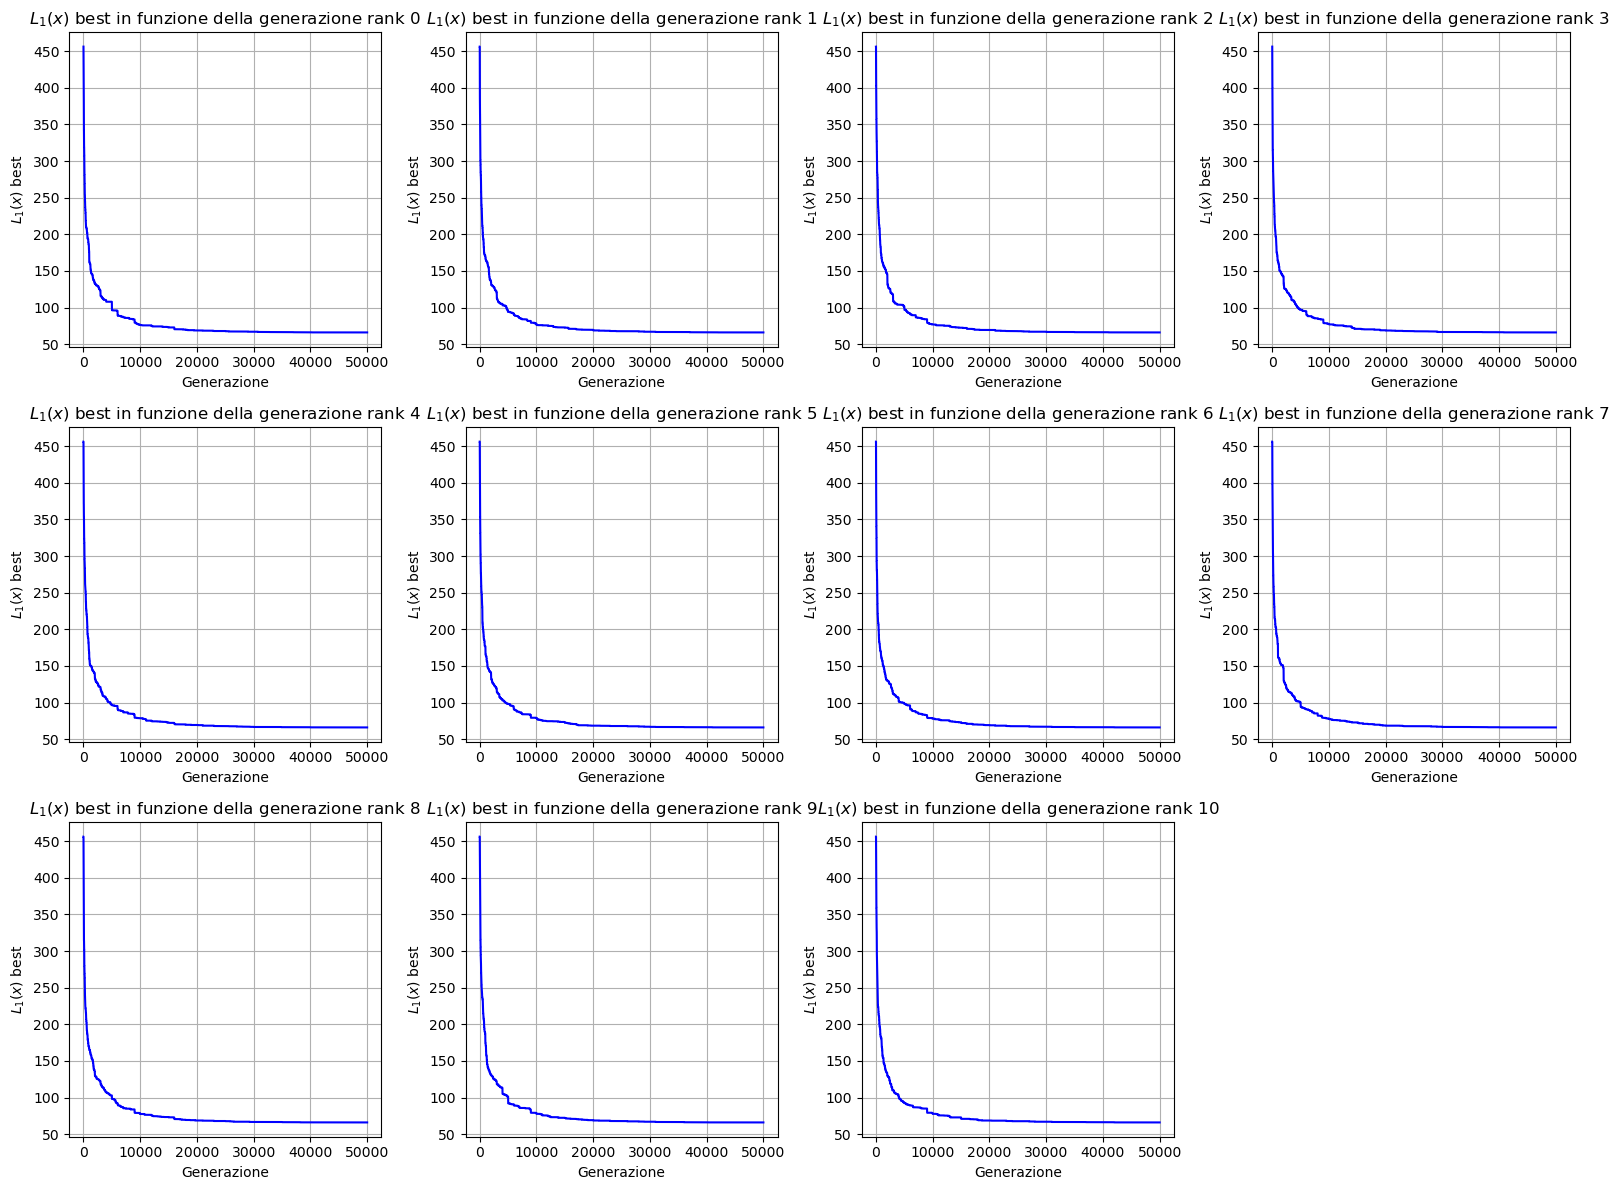

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Crea una griglia di subplot 3x4
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axes = axes.flatten()  # Trasforma in array 1D per accesso più semplice

for i in range(11):
    ax = axes[i]
    # Carica i dati
    data = np.loadtxt(f"comunicating/best_path_{i}.dat", comments="#")
    x = data[:, 0]
    y = data[:, 1]

    # Disegna il grafico nel subplot corrispondente
    ax.plot(x, y, '-', color='blue', markersize=4)
    ax.set_title(fr"$L_1(x)$ best in funzione della generazione rank {i}")#f per leggere i dal ciclo for, r per Latex
    ax.set_xlabel("Generazione")
    ax.set_ylabel(r"$L_1(x)$ best")
    ax.grid(True)

# Nasconde l’ultimo subplot se non usato (12°)
if len(axes) > 11:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


**Andamento di $\langle L_1(x)\rangle$ in funzione delle generazioni per ogni rank. Core comunicanti**

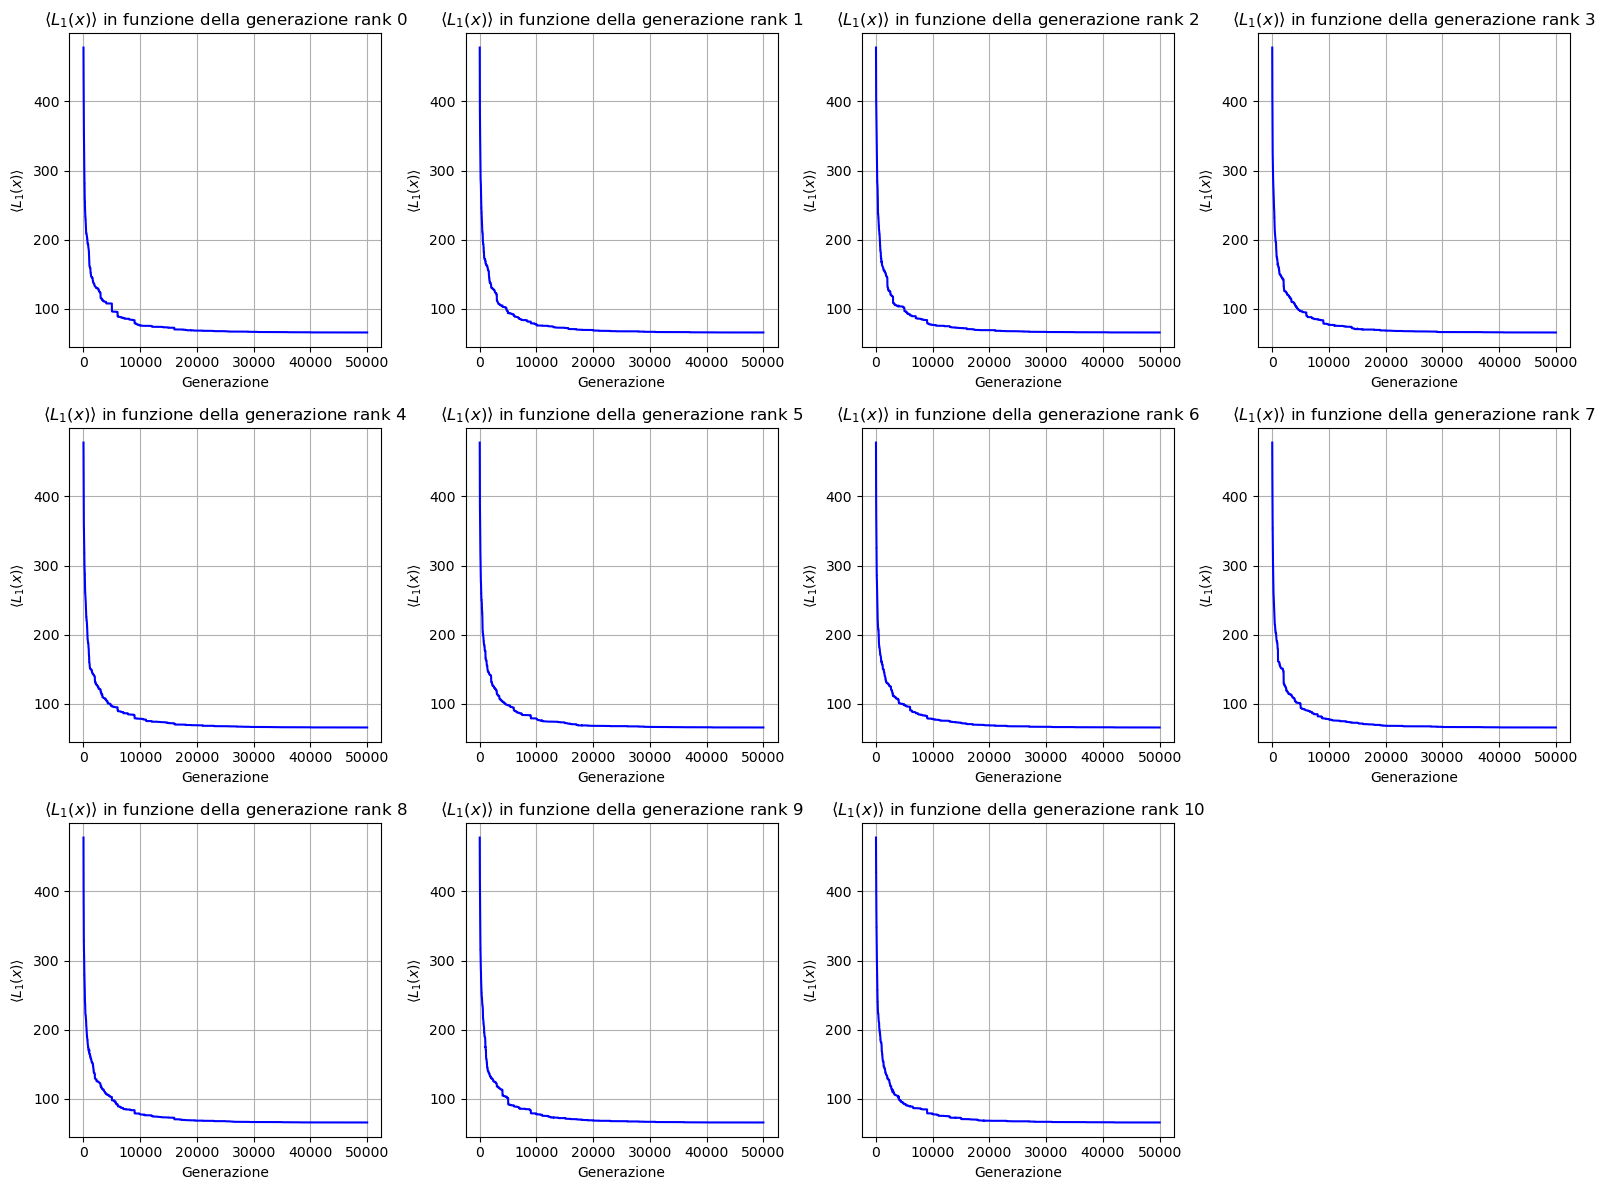

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Crea una griglia di subplot 3x4
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axes = axes.flatten()  # Trasforma in array 1D per accesso più semplice

for i in range(11):
    ax = axes[i]
    # Carica i dati
    data = np.loadtxt(f"comunicating/best_path_half_population_{i}.dat", comments="#")
    x = data[:, 0]
    y = data[:, 1]

    # Disegna il grafico nel subplot corrispondente
    ax.plot(x, y, '-', color='blue', markersize=4)
    ax.set_title(fr"$\langle L_1(x) \rangle$ in funzione della generazione rank {i}")
    ax.set_xlabel("Generazione")
    ax.set_ylabel(r"$\langle L_1(x) \rangle$")
    ax.grid(True)

# Nasconde l’ultimo subplot se non usato (12°)
if len(axes) > 11:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

## Commento e analisi
La risoluzione del problema del commesso viaggiatore utilizzando $11$ core comunicanti ha portato a una convergenza ottimale del percorso in ciascuno dei core.
Analizzando i percorsi del miglior individuo di ogni rank, si osserva che non vi sono intersezioni tra le tratte, segno che le soluzioni trovate sono ben ottimizzate dal punto di vista geometrico, una caratteristica tipica di una buona soluzione del $TSP$.

L’efficacia dell’approccio parallelo e comunicante risiede nella capacità di:
- scambiare informazioni tra i processi;
- diffondere i migliori individui trovati localmente,
- e quindi accelerare la convergenza globale verso soluzioni ottimali.

Questo meccanismo riduce il rischio di convergere verso minimi locali, fenomeno comune nei $TSP$ con molte città, specialmente quando le distanze tra di esse sono simili e lo spazio delle soluzioni comprende molti minimi locali. La collaborazione tra i core dunque non solo migliora l'efficienza computazionale, ma eleva anche la qualità delle soluzioni ottenute.

Si osserva in $L_1(x)$ e $\langle L_1(x)\rangle$ l'andamento tipico di un $TSP$:
- forte decrescita iniziale fino a $10000-15000$ generazioni
- successiva stabilizzazione con bruschi salti, segno di buone migrazioni che hanno aumentato il fitness del miglior individuo e della metà migliore della popolazione

Per un comunicazione efficace tra core bisogna scegliere attentamente $N_{migr}$. Un $N_{migr}$ troppo alto e dunque una scarsa comunicazione rallenta la convergenza e rischia di "intrappolare" ogni processo in minimi locali, poiché non beneficia abbastanza delle buone soluzioni trovate dagli altri processi. Un $N_{migr}$ troppo basso invece rallenta la convergenza perchè limita l’esplorazione indipendente dello spazio delle soluzioni da parte di ciascun core. In questo caso si è scelto un $N_{migr} = 1000$ che rappresenta un buon compromesso tra esplorazione locale e condivisione globale delle informazioni.

# Esercizio 10.2
L'esercizio richiede di risolvere il $TSP$ dei $110$ capoluoghi di provincia italiani utilizzando un algoritmo genetico con $11$ processi indipendenti, senza alcuna migrazione. Dal confronto con la risoluzione con i core comunicanti, stabilire quale è il metodo migliore. 

**Percorso di ogni rank. Core indipendenti**

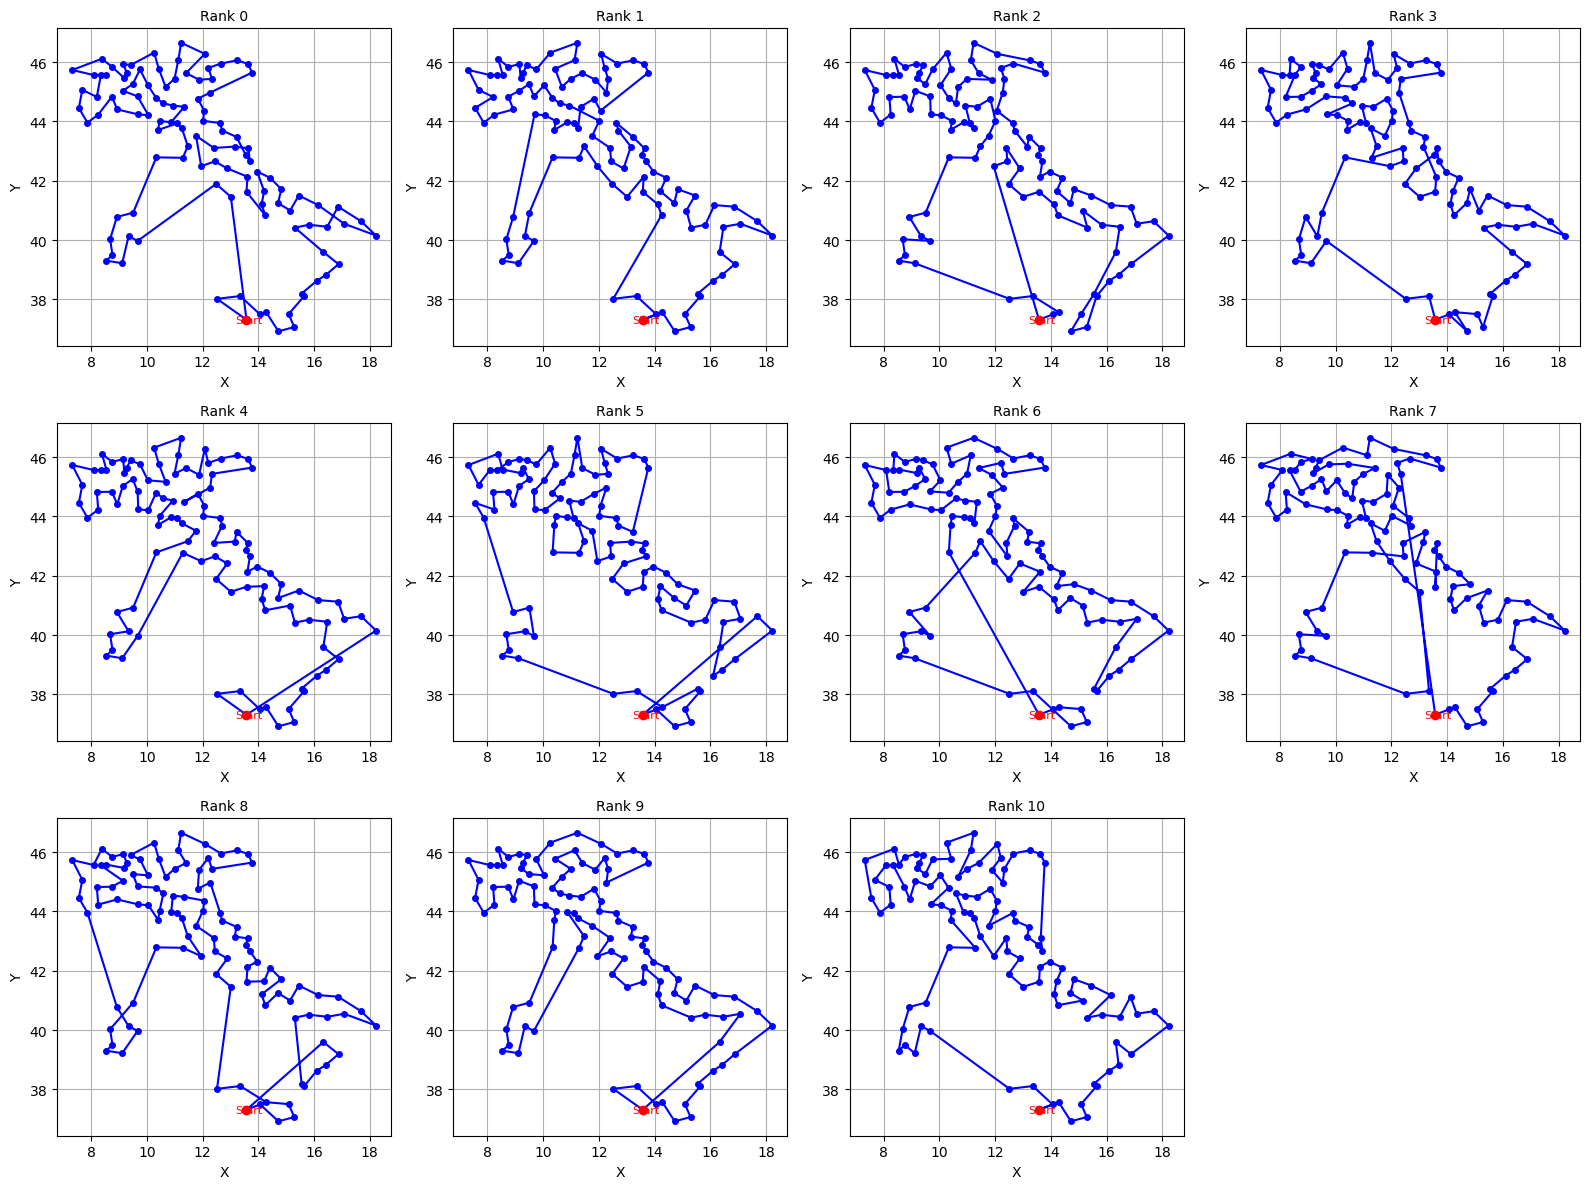

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Crea una griglia di subplot 3x4
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axes = axes.flatten()  # Trasforma in array 1D per accesso più semplice

for i in range(11):
    ax = axes[i]
    # Carica i dati
    data = np.loadtxt(f"indipendent/best_path_cartesian_coordinates_{i}.dat", comments="#")
    x = data[:, 1]
    y = data[:, 2]
    #aggiungo la prima città all'ultimo posto per chiudere il percorso nel grafico
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    # Disegna il grafico nel subplot corrispondente
    ax.plot(x, y, '-o', color='blue', markersize=4)
    #evidenzio la città di partenza
    ax.plot(x[0], y[0], 'ro', markersize=6)
    ax.text(x[0]+0.10, y[0] - 0.10, 'Start', color='red', ha='center', fontsize=8)
    ax.set_title(f"Rank {i}", fontsize=10)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)


# Nasconde l’ultimo subplot se non usato (12°)
if len(axes) > 11:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

**$L_1(x)$ del miglior individuo in funzione delle generazioni per ogni rank: confronto tra i due metodi**

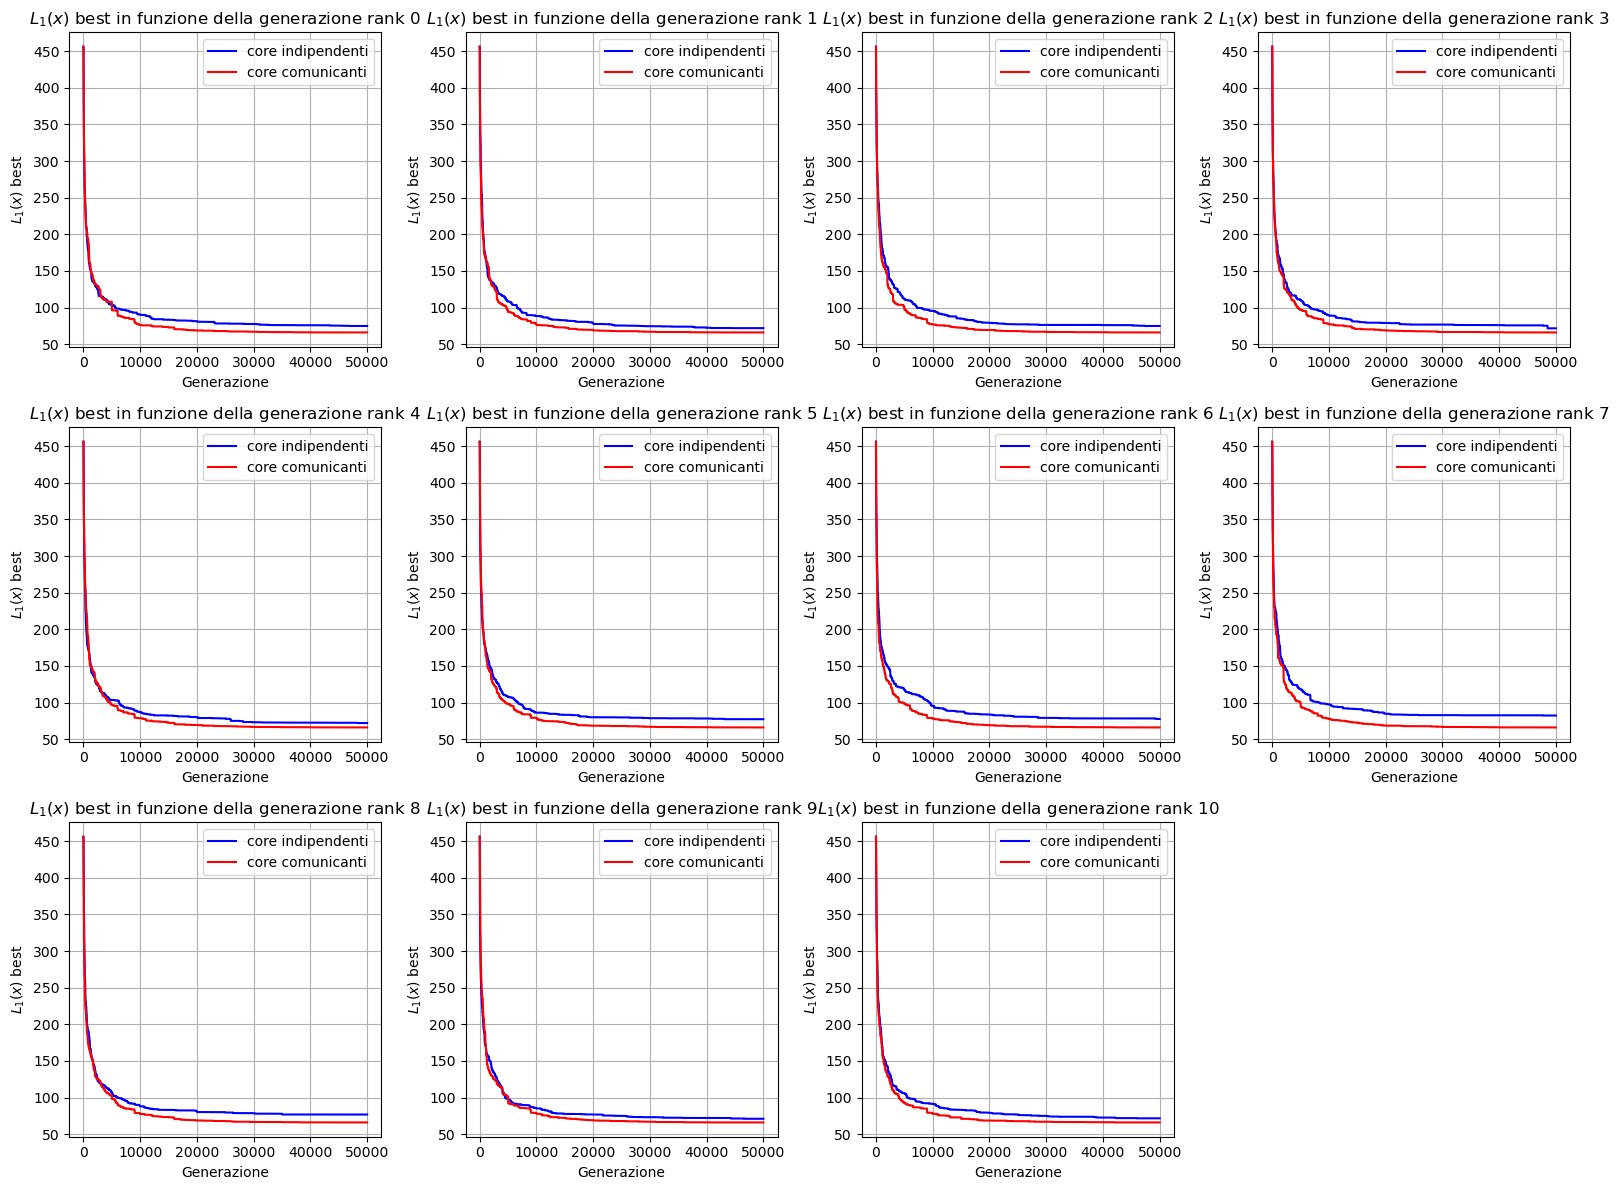

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Crea una griglia di subplot 3x4
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axes = axes.flatten()  # Trasforma in array 1D per accesso più semplice

for i in range(11):
    ax = axes[i]
    # Carica i dati dei core indipendenti
    data = np.loadtxt(f"indipendent/best_path_{i}.dat", comments="#")
    x = data[:, 0]
    y = data[:, 1]
    # Carica i dati dei core comunicanti
    data1 = np.loadtxt(f"comunicating/best_path_{i}.dat", comments="#")
    x1 = data1[:, 0]
    y1 = data1[:, 1]

    # Disegna il grafico nel subplot corrispondente
    ax.plot(x, y, '-', color='blue', markersize=4, label = 'core indipendenti')
    ax.plot(x1, y1, '-', color='red', markersize=4, label = 'core comunicanti')
    ax.set_title(fr"$L_1(x)$ best in funzione della generazione rank {i}")#f per leggere i dal ciclo for, r per Latex
    ax.set_xlabel("Generazione")
    ax.set_ylabel(r"$L_1(x)$ best")
    ax.grid(True)
    ax.legend()

# Nasconde l’ultimo subplot se non usato (12°)
if len(axes) > 11:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

**Andamento di $\langle L_1(x)\rangle$ in funzione delle generazioni per ogni rank: confronto tra i due metodi**

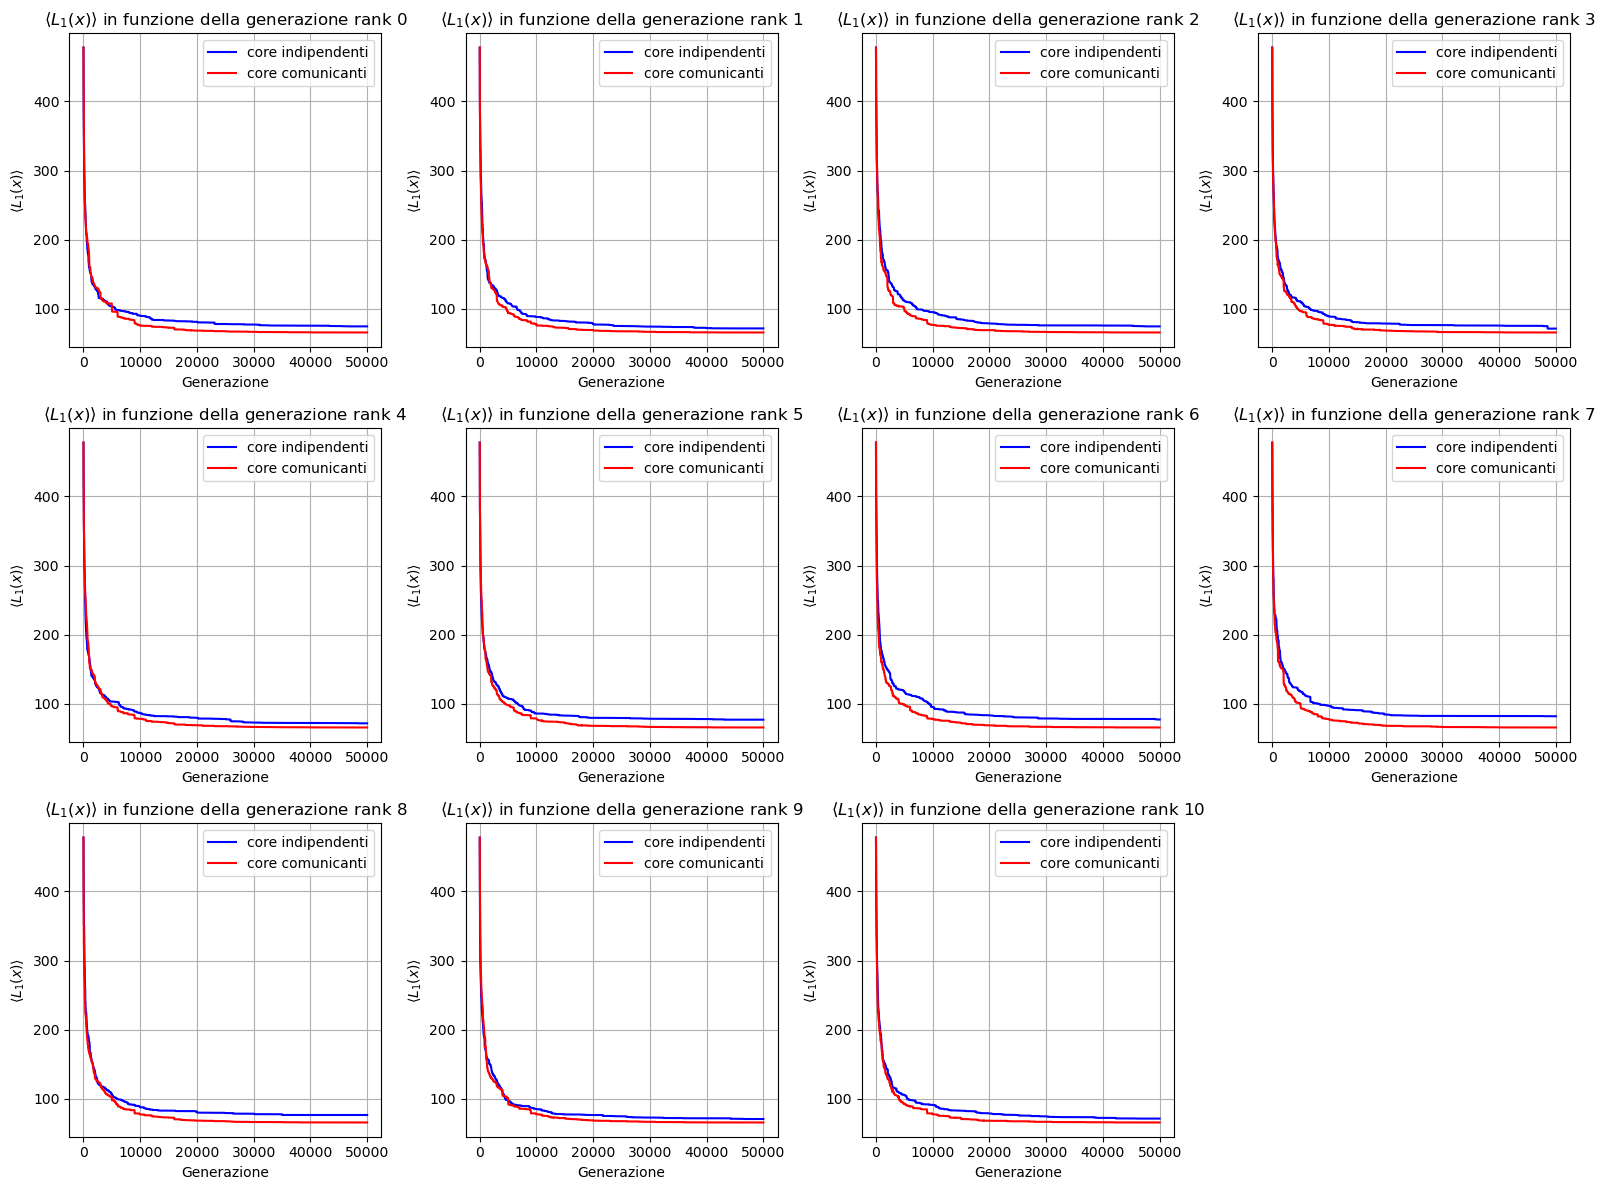

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Crea una griglia di subplot 3x4
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axes = axes.flatten()  # Trasforma in array 1D per accesso più semplice

for i in range(11):
    ax = axes[i]
    # Carica i dati dei core indipendenti
    data = np.loadtxt(f"indipendent/best_path_half_population_{i}.dat", comments="#")
    x = data[:, 0]
    y = data[:, 1]
    # Carica i dati dei core comunicanti
    data1 = np.loadtxt(f"comunicating/best_path_half_population_{i}.dat", comments="#")
    x1 = data1[:, 0]
    y1 = data1[:, 1]

    # Disegna il grafico nel subplot corrispondente
    ax.plot(x, y, '-', color='blue', markersize=4, label = 'core indipendenti')
    ax.plot(x1, y1, '-', color='red', markersize=4, label = 'core comunicanti')
    ax.set_title(fr"$\langle L_1(x) \rangle$ in funzione della generazione rank {i}")
    ax.set_xlabel("Generazione")
    ax.set_ylabel(r"$\langle L_1(x) \rangle$")
    ax.grid(True)
    ax.legend()

# Nasconde l’ultimo subplot se non usato (12°)
if len(axes) > 11:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

## Commento e analisi
E' evidente dai percorsi del miglior individuo per ogni rank, che utilizzando $11$ core indipendenti non si arriva a una soluzione ottimale del problema: i percorsi evidenziano intersezioni tra le rette, segno di una soluzione non ottimale del $TSP$ ma di un minimo locale dello stesso. 

Questa evidenza si osserva anche nel confronto tra grafici di $L_1(x)$ e $\langle L_1(x)\rangle$. L'andamento di entrambi i metodi è simile con forte decrescita iniziale e stabilizzazione con qualche brusca discesa, tuttavia quest'ultime sono molto rare nel caso di core indipendenti e comportano una stagnazione in minimi locali. In sintesi, senza migrazioni, ogni core tende a convergere prematuramente verso soluzioni sub-ottimali. Di conseguenza, sia la fitness del miglior individuo, sia quella della metà migliore della popolazione risultano inferiori rispetto al caso con core comunicanti, in cui l’interscambio di individui permette una più efficace esplorazione dello spazio delle soluzioni.

## Conclusioni
L'utilizzo di core comunicanti si è dimostrato efficace nel migliorare sia la qualità delle soluzioni ottenute che l'efficienza della convergenza. La migrazione periodica dei migliori individui tra i processi consente infatti una più ampia esplorazione dello spazio delle soluzioni, riducendo il rischio di stagnazione in minimi locali.

Rispetto all’approccio con core indipendenti, la comunicazione tra processi permette di diffondere rapidamente le soluzioni migliori di ogni processo, accelerando la convergenza verso la soluzione ottimale globale. Inoltre, questa strategia risulta più robusta anche in presenza di problemi complessi di $TSP$, dove lo spazio delle soluzioni è vasto e si riscontrano molti ottimi locali.